In [ ]:
!pip install gensim scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 26.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field'], ['word', 'embeddings', 'capture', 'semantic', 'meanings'], ['nlp', 'is', 'used', 'in', 'chatbots', 'and', 'virtual', 'assistants'], ['word2vec', 'is', 'a', 'powerful', 'tool', 'for', 'creating', 'word', 'embeddings']]
['is', 'embeddings', 'word', 'a', 'creating', 'for', 'tool', 'powerful', 'word2vec', 'assistants']
[array([-5.3482049e-04,  2.3825991e-04,  5.1056668e-03,  9.0133334e-03,
       -9.3041826e-03, -7.1184216e-03,  6.4591165e-03,  8.9739896e-03,
       -5.0175558e-03, -3.7653942e-03,  7.3820921e-03, -1.5338163e-03,
       -4.5345500e-03,  6.5530594e-03, -4.8587834e-03, -1.8163866e-03,
        2.8779216e-03,  9.9028728e-04, -8.2870843e-03, -9.4514126e-03,
        7.3109688e-03,  5.0709019e-03,  6.7580235e-03,  7.6032913e-04,
        6.3481932e-03, -3.4047901e-03, -9.4892143e-04,  5.7721287e-03,
       -7.5215534e-03, -3.9352756e-03, -7.5127776e-03, -9.3112560e-04,
        9.5384931e-03, -7.3194429e-03, 

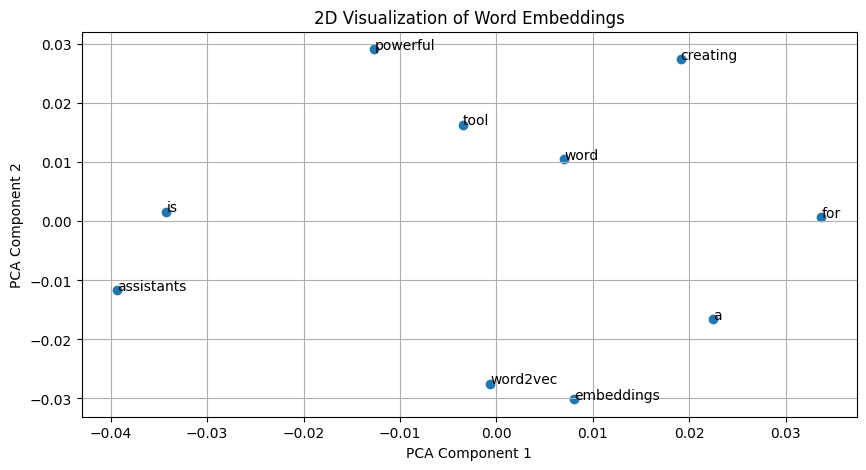

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')   # this is enough
# nltk.download('punkt_tab')  # REMOVE this line (not needed)

# Sample corpus
corpus = [
    "Natural language processing is a fascinating field",
    "Word embeddings capture semantic meanings",
    "NLP is used in chatbots and virtual assistants",
    "Word2Vec is a powerful tool for creating word embeddings"
]

# Tokenize sentences
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
print(tokenized_corpus)

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec.model")

model = Word2Vec.load("word2vec.model")

# Get vectors for a subset of words
words = list(model.wv.index_to_key)[:10]  # Select the first 10 words
print(words)
word_vectors = [model.wv[word] for word in words]
print(word_vectors)

from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

import matplotlib.pyplot as plt

# Plot the words in 2D space
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

# Annotate the points with the words
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()
